In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 폰트 설정
mpl.rc('font', family='Malgun Gothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [3]:
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

# Seaborn을 이용한 데이터 분포 시각화
- 그래봤자 plt.title(), plt.show() 처럼 plt 메소드 사용
- https://datascienceschool.net/01%20python/05.04%20Seaborn%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html

### 1차원 데이터

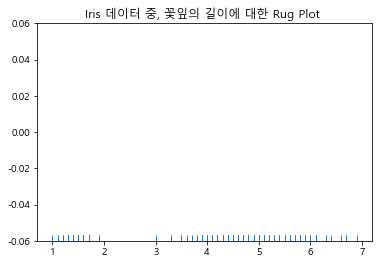

In [11]:
x = iris.petal_length.values

sns.rugplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Rug Plot ")
plt.show()

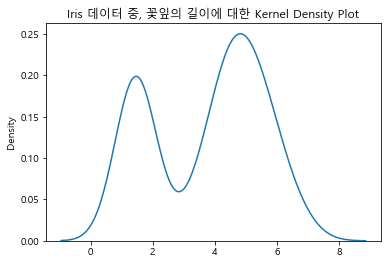

In [6]:
sns.kdeplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot")
plt.show()

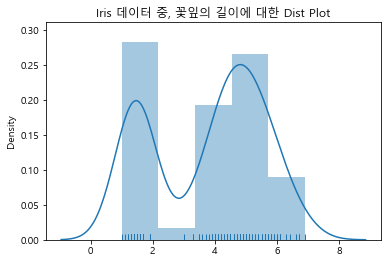

In [10]:
# 다 같이 쓴다
sns.distplot(x, kde=True, rug=True)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot")
plt.show()

색깔을 자동으로 입혀주는 게 아주 큰 장점

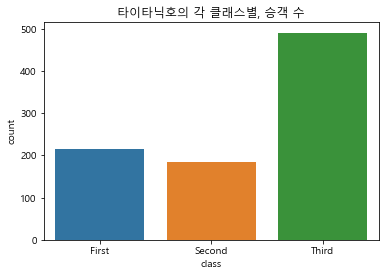

In [13]:
# 카운트 플롯: groupby(열).count() 한 값을 보여준다
sns.countplot(x="class", data=titanic)
# countplot(x='열', data=데이터프레임)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

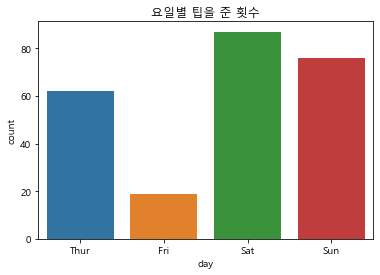

In [14]:
sns.countplot(x="day", data=tips)
plt.title("요일별 팁을 준 횟수")
plt.show()

In [15]:
tips.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


### 2차원 데이터
- 데이터 x,y축이 모두 실수 값인 경우
- 데이터 x,y축이 모두 범주형인 경우
- 데이터 x,y축이 하나는 실수, 다른 하나는 범주형인 경우


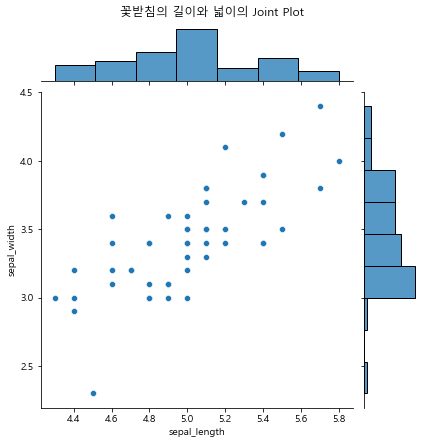

In [19]:
# x,y축이 모두 실수
sns.jointplot(x="sepal_length", y="sepal_width", data= iris[iris.species=='setosa'] )
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot", y=1.02)
plt.show()

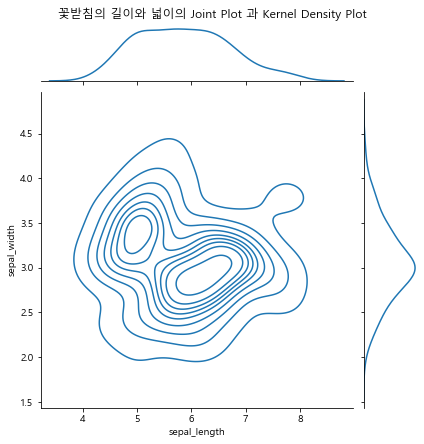

In [20]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot 과 Kernel Density Plot", y=1.02)
plt.show()

### 다차원 데이터
- pairplot(데이터프레임)

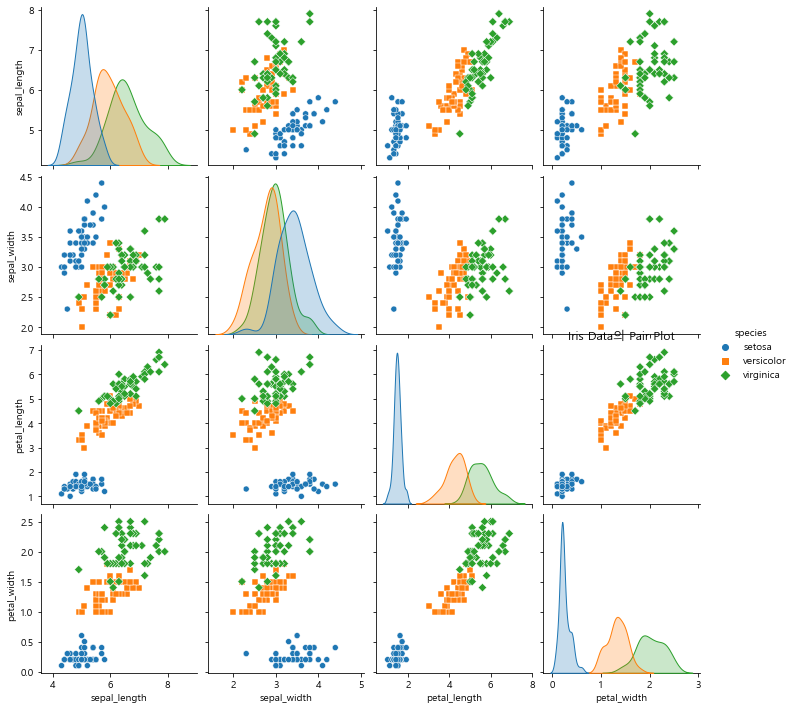

In [27]:
sns.pairplot(iris, hue='species', markers=['o','s','D'])
# hue 종 별로 색깔 입히기
plt.title("Iris Data의 Pair Plot")
plt.show()

### 2차원 범주형 데이터
- heatmap

In [28]:
titanic_size = titanic.pivot_table(
    index="class", columns="sex", aggfunc="size")
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


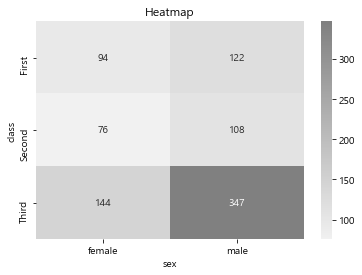

In [29]:
sns.heatmap(titanic_size, cmap=sns.light_palette(
    "gray", as_cmap=True), annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

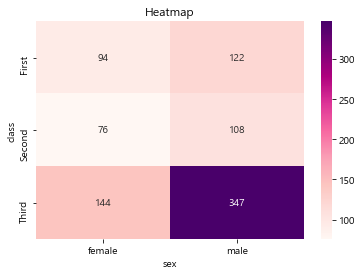

In [36]:
# 색깔 선택하기
sns.heatmap(titanic_size, cmap='RdPu', annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

### 2차원 복합 데이터¶
만약 데이터가 2차원이고 실수 값, 카테고리 값이 섞여 있다면 기존의 플롯 이외에도 다음과 같은 분포 플롯들을 이용할 수 있다.
- barplot
- boxplot
- pointplot
- violinplot
- stripplot
- swarmplot


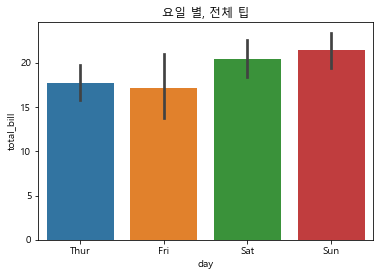

In [64]:
sns.barplot(x="day", y="total_bill", data=tips)
plt.title("요일 별, 전체 팁")
plt.show()

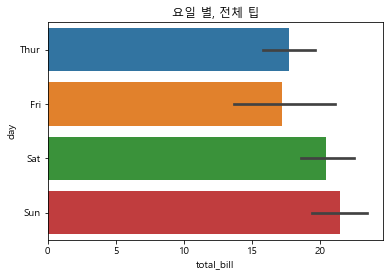

In [65]:
# barh 그래프, x와 y 자리만 바꿔주면 됨
sns.barplot(y="day", x="total_bill", data=tips)
plt.title("요일 별, 전체 팁")
plt.show()


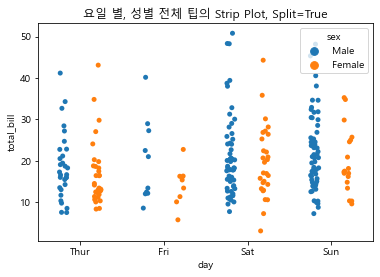

In [63]:
sns.stripplot(x="day", y="total_bill", hue="sex",
              data=tips, jitter=True, dodge=True)
plt.title("요일 별, 성별 전체 팁의 Strip Plot, Split=True")
plt.show()

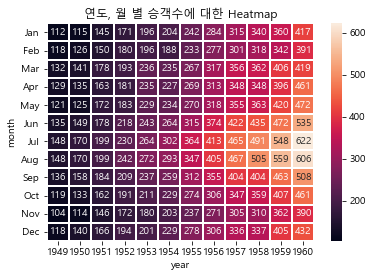

In [62]:
flights_passengers = flights.pivot("month", "year", "passengers")
plt.title("연도, 월 별 승객수에 대한 Heatmap")
sns.heatmap(flights_passengers, annot=True, fmt="d", linewidths=1)
plt.show()